In [1]:
%pylab inline

import sys, os
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


In [2]:
nb_directory = os.getcwd()
print(nb_directory)
sys.path.insert(0, os.path.join(nb_directory, '..'))

/Users/mariannejbr/Dropbox/Chi2-Cosmo-Dev/notebooks


In [3]:
from chi2_cosmo_dev.cosmology_for_h6 import *
#from chi2_cosmo_dev.cosmology_sixth_hubble import *

In [4]:
C

299792458.0

In [5]:
gr_param = (0,)
beta_param = (1e-7,)
cosmo_params = (0.67, 0.3)
H0beta = hubble_6(0, beta_param, cosmo_params)
H0gr = hubble_6(0, gr_param, cosmo_params)
H0beta, H0gr

(66.999999999961005, 67.0)

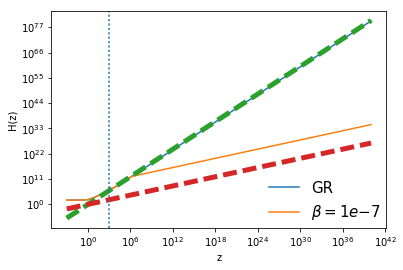

In [6]:
z_test = geomspace(1e-3, 1e40, 128)
hubb_results = np.zeros_like(z_test)
hubb_results2 = np.zeros_like(z_test)

for idz, z in enumerate(z_test):
    hbv = hubble_6(z, gr_param, cosmo_params)
    hbv2 = hubble_6(z, beta_param, cosmo_params)
    hubb_results[idz] = hbv
    hubb_results2[idz] = hbv2
      
plot(z_test, hubb_results, label='GR')
plot(z_test, hubb_results2, label = r'$\beta=1e{-7}$')

plot(z_test, z_test ** 2, ls='--', lw=5)
plot(z_test, z_test ** (2 / 3), ls='--', lw=5)

legend(loc='best', borderaxespad=0., prop={'size':15}, frameon=False)
xscale('log')
yscale('log')
ylabel('H(z)')
xlabel('z')

axvline(ZDRAG, ls=':')

#xlim(left=1e-4)
#xlim(1e-3,1e14)


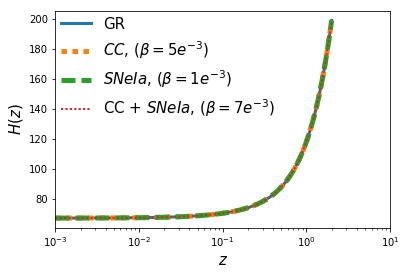

In [35]:
z_test = geomspace(1e-3, 2, 128)
hubb_results = np.zeros_like(z_test)
hubb_resultscc = np.zeros_like(z_test)
hubb_resultssu = np.zeros_like(z_test)
hubb_resultst= np.zeros_like(z_test)


betas = np.array([0.0055649508417091216, 0.001609683257802201, 0.0072311690753572673])
for idz, z in enumerate(z_test):
    hbv = hubble_6(z, gr_param, cosmo_params)
    hbvcc = hubble_6(z, (0.0055649508417091216,), cosmo_params)
    hbvsu = hubble_6(z, (0.0016096832,), cosmo_params)
    hbvt = hubble_6(z, (0.00723116,), cosmo_params)
    
    
    hubb_results[idz] = hbv
    hubb_resultscc[idz] = hbvcc
    hubb_resultssu[idz] = hbvsu
    hubb_resultst[idz] = hbvt
    
      
plot(z_test, hubb_results, lw=3, label='GR')
plot(z_test, hubb_resultscc,ls =':', lw=5, label = r'$CC$, ($\beta=5e^{-3}$)')
plot(z_test, hubb_resultssu,ls ='--', lw=5, label = r'$SNeIa$, ($\beta=1e^{-3}$)')
plot(z_test, hubb_resultst,ls =':', lw=2, label = r'CC + $SNeIa$, ($\beta=7e^{-3}$)')



legend(loc='best', borderaxespad=0., prop={'size':15}, frameon=False)
xscale('log')
#yscale('log')
ylabel(r'$H(z)$',size=15)
xlabel(r'$z$', size=15)


#xlim(left=1e-4)
xlim(1e-3,1e1)

savefig('./../figures/hofz_betas_bfv.pdf', dpi=300, bbox_inches='tight')

In [8]:
#hubble_6(0,)

(0.01, 8)

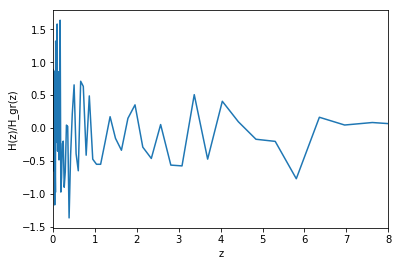

In [9]:
z_test = geomspace(1e-4, 10, 128)
#z_test=linspace(0,10,1000)
hubb_results = np.zeros_like(z_test)
hubb_results2 = np.zeros_like(z_test)

for idz, z in enumerate(z_test):
    hbv = hubble_6(z, gr_param, cosmo_params)
    hbv2 = hubble_6(z, beta_param, cosmo_params)
    hubb_results[idz] = hbv
    hubb_results2[idz] = hbv2
      
plot(z_test, (hubb_results2/hubb_results-1)*1e12)


#xscale('log')
#yscale('log')
ylabel('H(z)/H_gr(z)')
xlabel('z')


xlim(1e-2,8)
#xlim(1e-3,1e14)


In [10]:
#hubb_results2/hubb_results

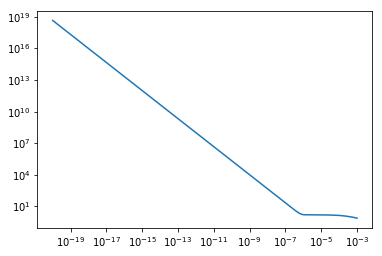

In [11]:
t_test = geomspace(1e-20, 1/1e3, 128)
hubbt_results = np.zeros_like(t_test)

for idz, tv in enumerate(t_test):
    z = 1 / tv
    hbv = 1 / hubble_6(z, beta_param, cosmo_params)
    hubbt_results[idz] = hbv
    
plot(t_test, hubbt_results / t_test**2)

xscale('log')
yscale('log')

In [12]:
z_test = geomspace(1100, 1e30, 128)
rs_int_results = np.zeros_like(z_test)
for idz, z in enumerate(z_test):
    rsv = r_s_integrand(z, beta_param, cosmo_params)
    rs_int_results[idz] = rsv
    
plot(z_test, rs_int_results)

xscale('log')
yscale('log')

# Change of variables

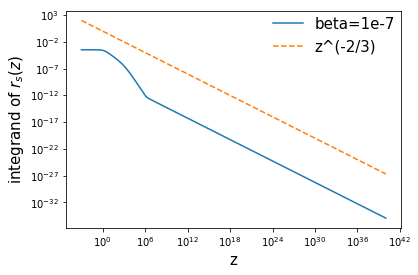

In [13]:
z_range = geomspace(1e-3, 1e40, 128)
rs_int_results = np.zeros_like(z_test)
for idz, zv in enumerate(z_range):
    rsv = r_s_integrand(zv, beta_param, cosmo_params)
    rs_int_results[idz] = rsv
    
plot(z_range, rs_int_results, label='beta=1e-7')
plot(z_range, z_range ** (-2/3), ls='--', label='z^(-2/3)')
legend(loc='best', borderaxespad=0., prop={'size':15}, frameon=False)
xlabel('z', size=15)
ylabel(r'integrand of $r_s(z)$', size=15)
xscale('log')
yscale('log')

# Integration using change of variables

In [14]:
def alt_r_s_integrand(tv, model_params, cosmo_params):
    """"""
    zv = 1 / tv
    h, OmegaM = cosmo_params
    cs = 1 / sqrt(3 * (1 + btog(zv, h)))
    
    int_num = cs / hubble_6(zv, beta_param, cosmo_params)

    return int_num / tv ** 2

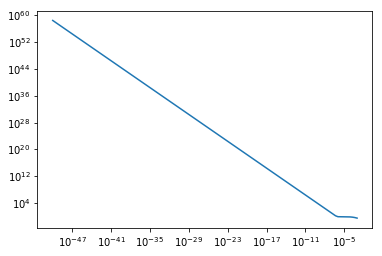

In [15]:
t_range = geomspace(1e-50, 1/ZDRAG, 128)
rs_int_alt_results = np.zeros_like(z_test)
for idz, tv in enumerate(t_range):
    rsv = alt_r_s_integrand(tv, beta_param, cosmo_params)
    rs_int_alt_results[idz] = rsv
    
plot(t_range, rs_int_alt_results)
#plot(t_range, t_range ** (-4/3), ls='--')

xscale('log')
yscale('log')

In [16]:
def alt_r_s(zeval, model_params, cosmo_params, exp_lowlim=None):
    """Sound horizon at zeval either zdrag or zdec"""
    exp_lowlim = exp_lowlim or 0
    r_sound, error = integrate.quad(alt_r_s_integrand, exp_lowlim, 1 / zeval,
                                    args=(beta_param, cosmo_params)
                                    )
    return r_sound

In [17]:
alt_r_s(ZDRAG, beta_param, cosmo_params, exp_lowlim=1e-9)

0.0004984131135087401

In [18]:
r_s_integrand(1100, beta_param, cosmo_params)
r_s_integrand(110000, beta_param, cosmo_params)

7.2772860138688379e-11

# $r_s$

In [19]:
r_s_integrand(1e60, beta_param, cosmo_params)

5.5628881235785598e-49

## Problematic function

In [20]:
r_s(ZDRAG, beta_param, cosmo_params, 1e40)

359546.37450612517

In [21]:
r_s(ZDRAG, gr_param, cosmo_params, 1e70)

2.468658736219833e-67

In [22]:
rBAO(0.01, gr_param, cosmo_params)

3.3494520437429287

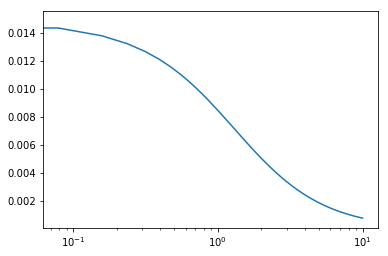

In [23]:
z_test = linspace(0, 10, 128)
d_vz_results = np.zeros_like(z_test)
for idz, z in enumerate(z_test):
    dvz_v = d_vz_integrand(z, beta_param, cosmo_params)
    d_vz_results[idz] = dvz_v
    
plot(z_test, d_vz_results)

xscale('log')

In [24]:
d_vz(2, beta_param, cosmo_params)

0.014852724697725722

In [25]:
mu_SNe(0.02, beta_param, cosmo_params)

34.792041086125835

In [30]:
mu_SNe(0.02, gr_param, cosmo_params)

-9.9761659431533829

In [26]:
from chi2_cosmo_dev.chi2_h6 import chi2SNe

In [27]:
chi2SNe(gr_param, cosmo_params)

672.35327675208157

In [46]:
mu_SNe(0.02, gr_param, cosmo_params)

7.4079375714862579

In [53]:
d=distance_SNe(1, gr_param, cosmo_params)

In [54]:
5 * np.log10(d) + 25

16.81103480790814

In [37]:
betas = np.array([0.0055649508417091216, 0.001609683257802201, 0.0072311690753572673])
omega_m_s = np.array[(0.28797243708274733, 0.27025010392925386, 0.26790948836149531)]
h_bfvs = np.array([0.68029612954387286, 0.70002116698411487, 0.70008486307918039])
Rcmb(gr_param, cosmo_params)

5.8063608833391788e-06

In [48]:
thetastar_cc_to_lcdm = Rcmb((0.0055649508417091216,), (0.680296,0.28797243))/Rcmb(gr_param, cosmo_params)

In [47]:
thetastar_su_to_lcdm = Rcmb((0.001609683257802201,), (0.7000211669841, 0.2702501039))/Rcmb(gr_param, cosmo_params)

In [46]:
thetastar_t_to_lcdm = Rcmb((0.0072311690753572673,), (0.70008486307918, 0.2679094883))/Rcmb(gr_param, cosmo_params)

In [49]:
thetastar_cc_to_lcdm, thetastar_su_to_lcdm, thetastar_t_to_lcdm 

(0.99579260341707021, 0.98921610804898374, 0.98831120226013902)

In [51]:
Rcmb((0.0055649508417091216,), cosmo_params)/Rcmb(gr_param, cosmo_params)

1.0000000000000049

In [52]:
Rcmb((0.001609683257802201,), cosmo_params)/Rcmb(gr_param, cosmo_params)

1.0000000000001255

In [53]:
Rcmb((0.0072311690753572673,),cosmo_params)/Rcmb(gr_param, cosmo_params)

0.99999999999997768